<a href="https://colab.research.google.com/github/zhanglijuan78/tf_tutorials/blob/master/movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://www.tensorflow.org/tutorials/keras/text_classification

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras

!pip install tensorflow-datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)

2.2.0-dev20200119


In [41]:
train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

((train_data, test_data), test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (train_validation_split, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

print("train_data shape: ", len(list(train_data)))

train_data shape:  15000


In [42]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32))

valid_batches = (
    valid_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32))

test_batches = (
    test_data
    .padded_batch(32))

for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)

Batch shape: (32, 1287)
label shape: (32,)
Batch shape: (32, 968)
label shape: (32,)


In [43]:
encoder = info.features['text'].encoder

model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1, activation='sigmoid')])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=10,
                    validation_data=valid_batches,
                    validation_steps=30)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.6886 - accuracy: 0.5829 - val_loss: 0.6834 - val_accuracy: 0.6094
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.6650 - accuracy: 0.6869 - val_loss: 0.6518 - val_accuracy: 0.7604
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.6205 - accurac

In [19]:
loss, accuracy = model.evaluate(test_batches)

print("\nLoss: ", loss)
print("Accuracy: ", accuracy)

history_dict = history.history
history_dict.keys()

    782/Unknown - 7s 9ms/step - loss: 0.3310 - accuracy: 0.8757
Loss:  0.3310336106363922
Accuracy:  0.87572


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

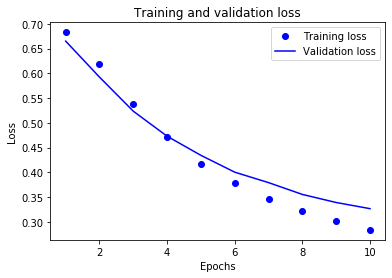

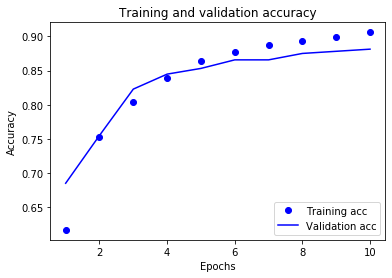

In [15]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [17]:
# A different model using one extra dense layer

encoder = info.features['text'].encoder

model_2 = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')])

model_2.summary()

model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(train_batches,
                      epochs=10,
                      validation_data=test_batches,
                      validation_steps=30)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 14s 18ms/step - loss: 0.6356 - accuracy: 0.6578 - val_loss: 0.5269 - val_accuracy: 0.7708
Epoch 2/10
782/782 [==============================] - 10s 12ms/step - loss: 0.3888 - accuracy: 0.8574 

In [18]:
loss_2, accuracy_2 = model_2.evaluate(test_batches)

print("\nLoss: ", loss_2)
print("Accuracy: ", accuracy_2)

    782/Unknown - 7s 9ms/step - loss: 0.3552 - accuracy: 0.8738
Loss:  0.35521549596677504
Accuracy:  0.87376


In [49]:
!pip install -q tensorflow-hub
import tensorflow_hub as hub

train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data_3, valid_data_3), test_data_3 = tfds.load(
    name="imdb_reviews/subwords8k", 
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True)

embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

model_3 = tf.keras.Sequential()
model_3.add(hub_layer)
model_3.add(tf.keras.layers.Dense(16, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_3.summary()

model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
# history_3 = model_3.fit(train_batches,
#                       epochs=10,
#                       validation_data=test_batches,
#                       validation_steps=30)

history_3 = model_3.fit(train_data_3.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=valid_data_3.batch(512),
                    verbose=1)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_20 (KerasLayer)  (None, 20)                400020    
_________________________________________________________________
dense_45 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored